In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batch_2 = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
batch_per_gene = []
fc_per_gene = []
genes = []
fc_inhibitor_per_gene = []

with open("microarray_TGFb1_forMarcell.csv", "r") as f:
    current_batch = ""
    lines_skipped = 0
    
    for line in f:           
        if ">>" in line and 'all' not in line:
            line = line.split()
            current_batch = line[1]
            lines_skipped = 0
            continue
        
        if current_batch and lines_skipped < 2:
            lines_skipped += 1
            continue

        if not current_batch:
            continue
        
        line = [field for field in line.rstrip().rstrip(',').split(',')]
        
        try:
            if current_batch == "A.only":
                gene = line[1]
                fc = float(line[5])
                genes.append(gene)
                fc_per_gene.append(fc)
                #fc_inhibitor_per_gene.append(float(line[9]))
                batch_per_gene.append(current_batch)

        except:
            continue

In [4]:
len(genes)

320

In [5]:
len(batch_per_gene)

320

In [6]:
len(fc_per_gene)

320

In [7]:
fc_per_gene

[-3.079817729,
 -2.995343719,
 -2.560519889,
 -2.522433601,
 -2.136479572,
 -2.117265353,
 -1.986624946,
 -1.91809958,
 -1.856794356,
 -1.782565727,
 -1.754423996,
 -1.694440021,
 -1.665502755,
 -1.63618856,
 -1.629585771,
 -1.62875479,
 -1.625939561,
 -1.598756884,
 -1.590536903,
 -1.569230722,
 -1.567446747,
 -1.546012128,
 -1.538179804,
 -1.532766883,
 -1.52215832,
 -1.520356008,
 -1.487171363,
 -1.476332659,
 -1.472876182,
 -1.464967237,
 -1.440764763,
 -1.430114568,
 -1.428037175,
 -1.427283804,
 -1.410622927,
 -1.406153028,
 -1.404497286,
 -1.399874596,
 -1.398598443,
 -1.395319565,
 -1.389644702,
 -1.389035974,
 -1.388525069,
 -1.385255923,
 -1.380361225,
 -1.37405074,
 -1.373746875,
 -1.373117037,
 -1.372261547,
 -1.371734476,
 -1.368838255,
 -1.364467408,
 -1.364240276,
 -1.362772416,
 -1.361863922,
 -1.352416257,
 -1.351992676,
 -1.351538421,
 -1.351249394,
 -1.351241041,
 -1.349503605,
 -1.348614709,
 -1.345219501,
 -1.337398176,
 -1.337103134,
 -1.334713804,
 -1.333811481,


In [8]:
fc_inhibitor_per_gene

[]

In [9]:
list(zip(fc_per_gene, fc_inhibitor_per_gene))

[]

In [10]:
interesting_indices = [i for i, left in enumerate(fc_per_gene) if left < -1]

In [13]:
len(interesting_indices)

157

In [14]:
#matrix = pandas.DataFrame({"gene": genes, "batch" : batch_per_gene, "fc": fc_per_gene})

In [15]:
#interesting_genes = matrix.loc[matrix['batch'] == 'A.only']

In [16]:
#interesting_genes

In [17]:
#interesting_genes = list(interesting_genes['gene'])

In [18]:
interesting_genes = np.array(genes)[interesting_indices]

In [19]:
len(interesting_genes)

157

In [20]:
common_genes = set(batch_2.var.index).intersection(set(interesting_genes))

In [21]:
len(common_genes)

11

In [23]:
common_genes

{'ADAMTS1',
 'ATP2B1',
 'DTWD1',
 'GRAMD3',
 'OSBPL8',
 'RAPH1',
 'SFRP4',
 'TNFRSF11B',
 'TXNRD1',
 'VGLL3',
 'WEE1'}

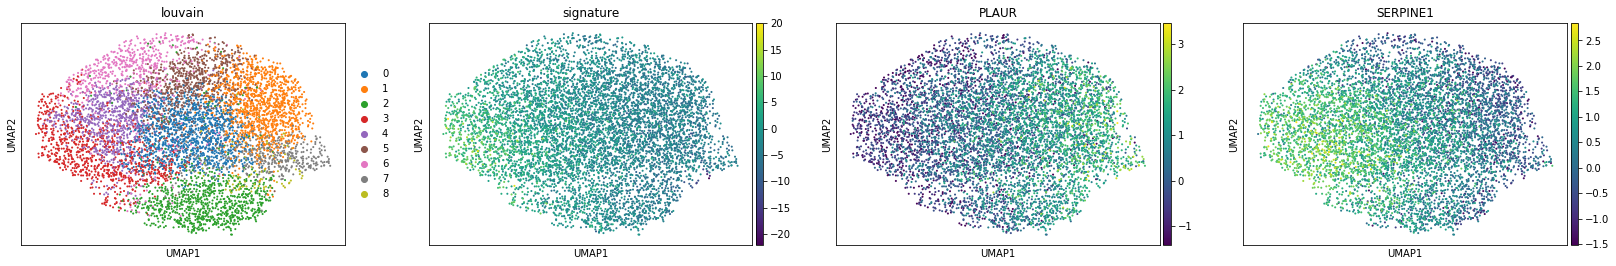

In [22]:
batch_2.obs["signature"] = batch_2[:,list(common_genes)].X.sum(1)
sc.pl.umap(batch_2, color=['louvain', 'signature', "PLAUR", "SERPINE1"])